In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [21]:
def plot_image(image_1, image_2, title_1="Ooriginal", title_2="New Image"):
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()

In [26]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

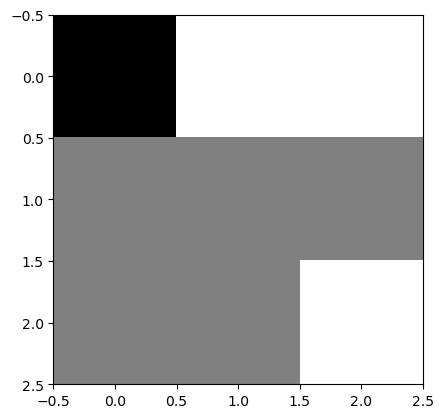

toy_image:  [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [4]:
toy_image =  np.array([[0,2,2],[1,1,1],[1,1,2]], dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image: ", toy_image)

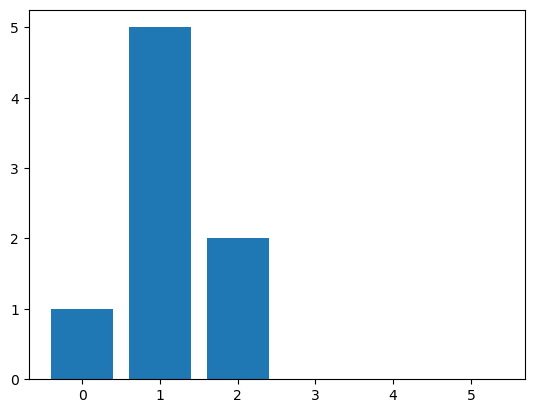

In [5]:
plt.bar([x for x in range(6)], [1, 5, 2, 0, 0, 0])
plt.show()

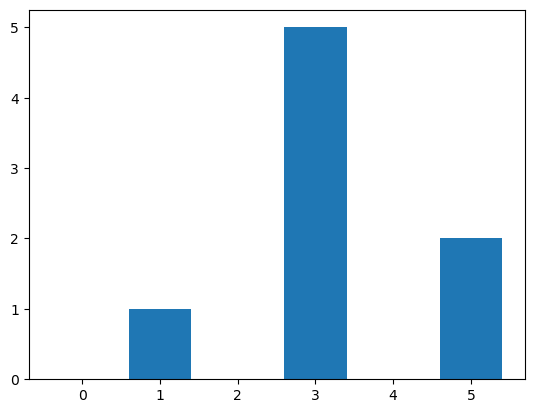

In [6]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

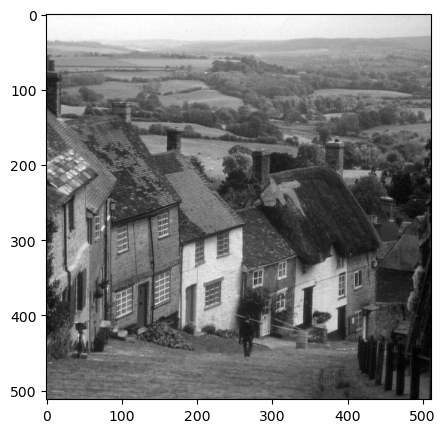

In [7]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [8]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])

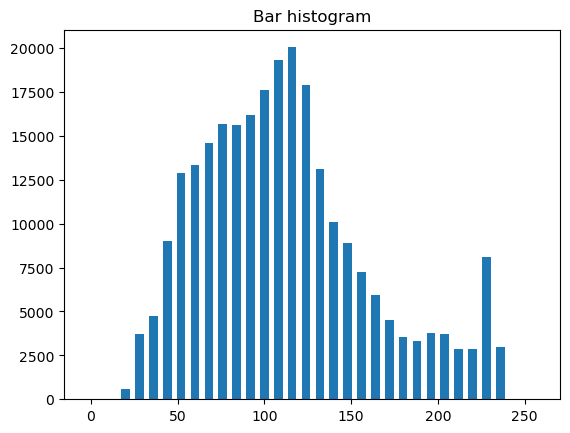

In [9]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [10]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

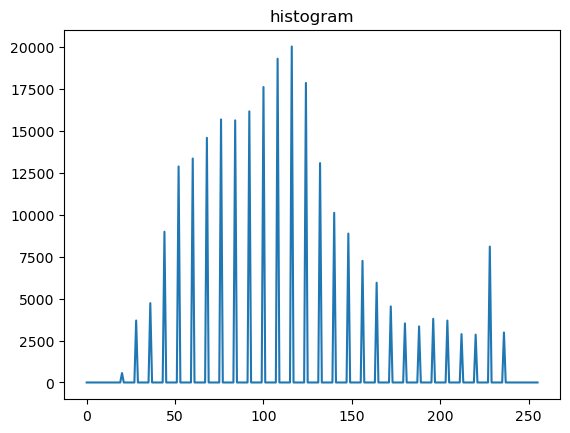

In [11]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

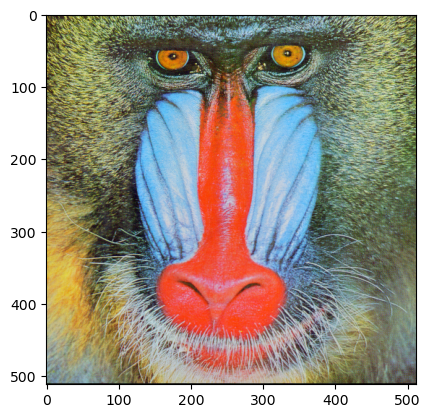

In [12]:
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

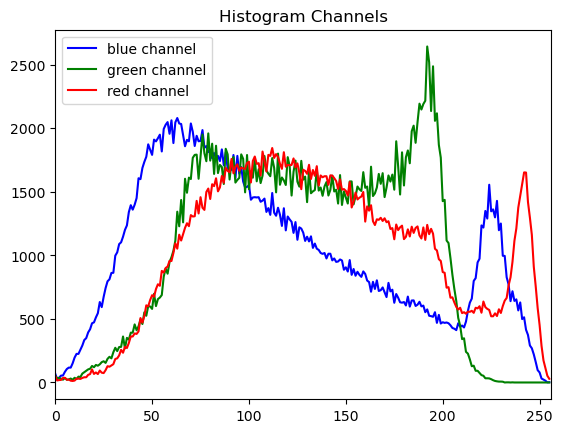

In [13]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

In [14]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


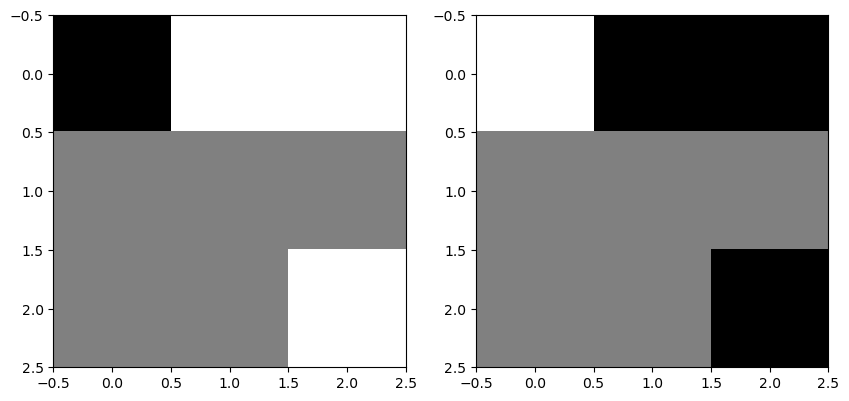

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

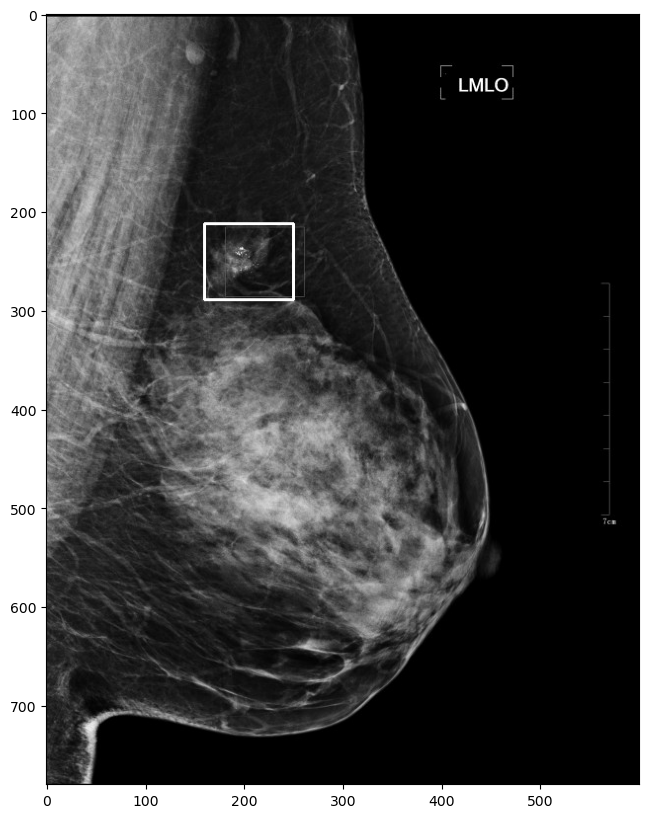

In [16]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [17]:
img_neg = -1 * image + 255

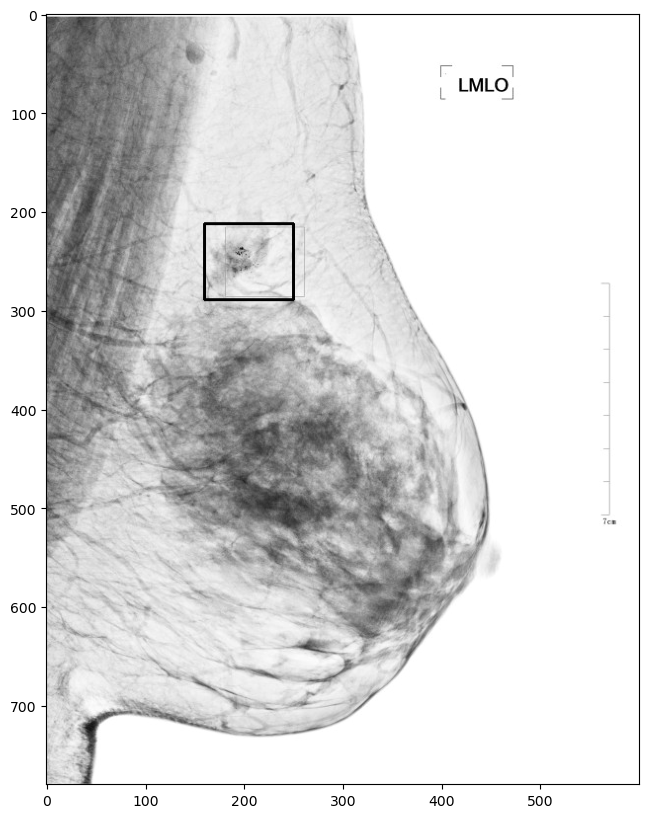

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

In [19]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

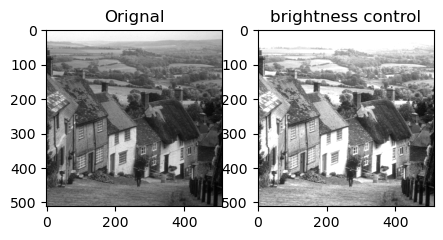

In [24]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

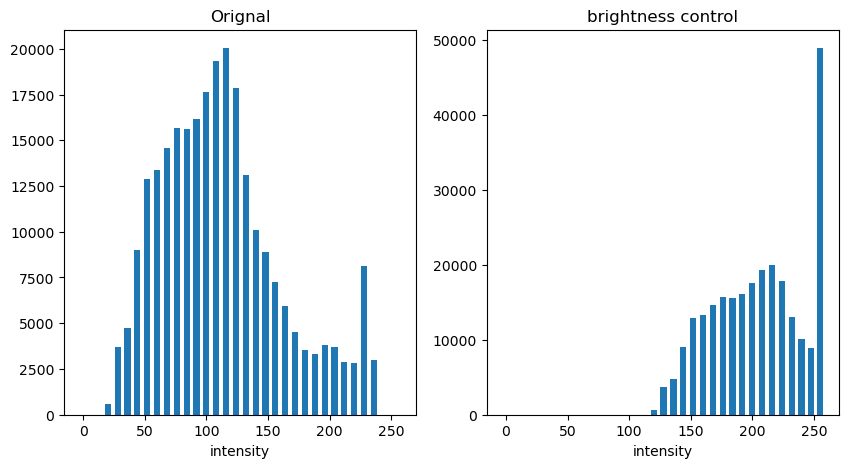

In [27]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [28]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

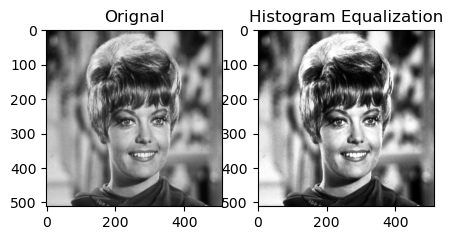

In [29]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

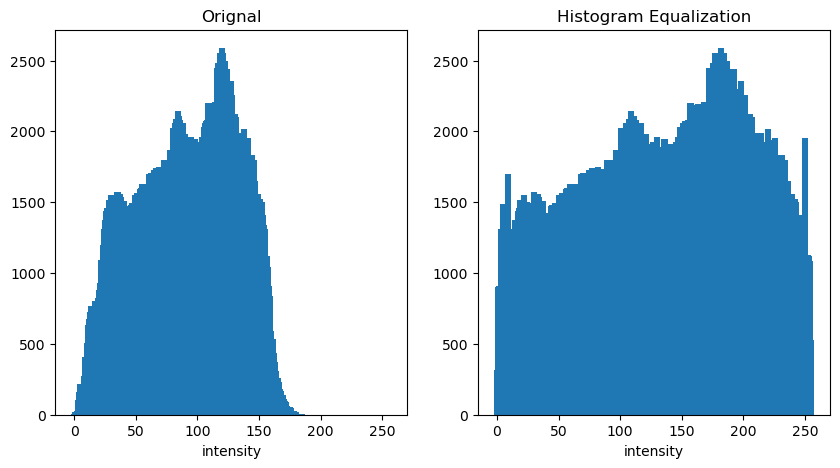

In [30]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

In [31]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out         

In [32]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [33]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

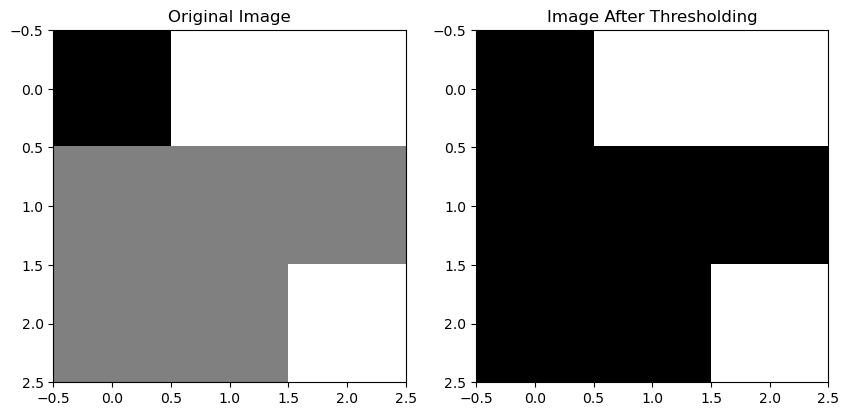

In [34]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

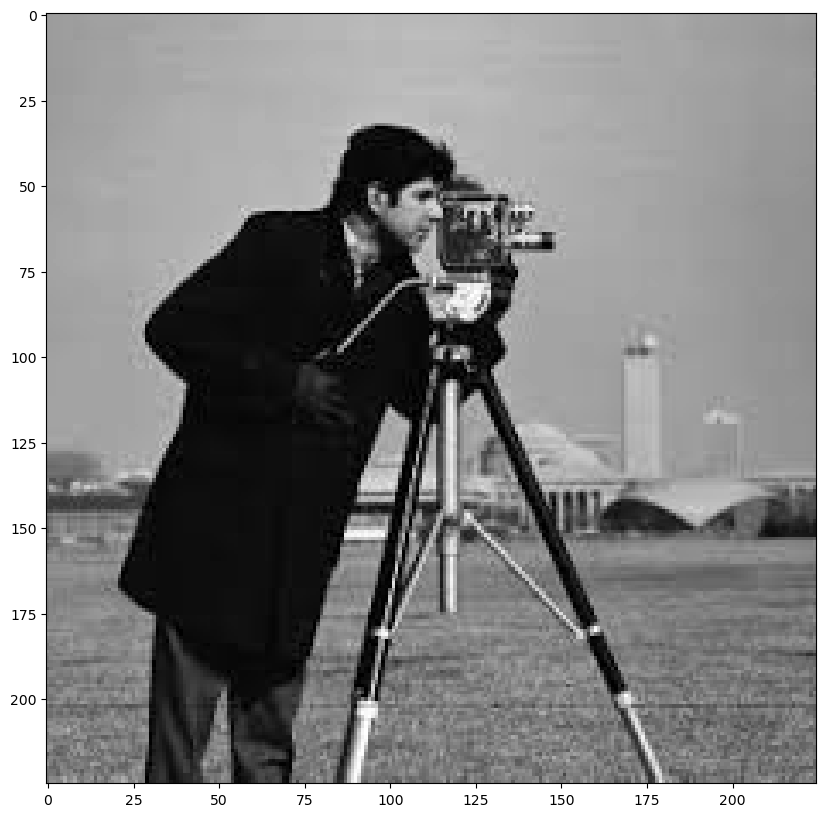

In [35]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

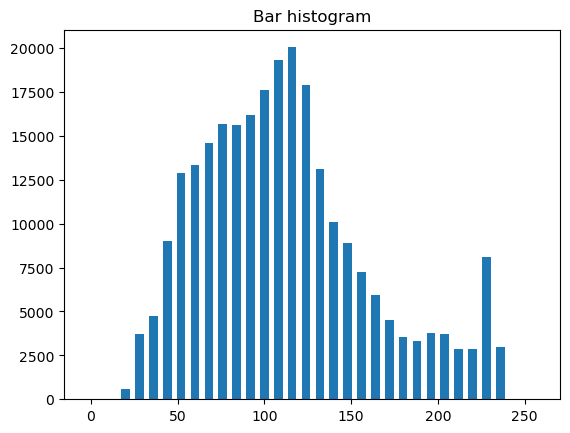

In [36]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [37]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

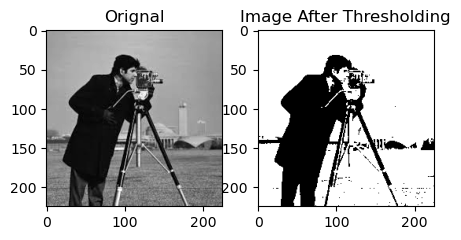

In [38]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

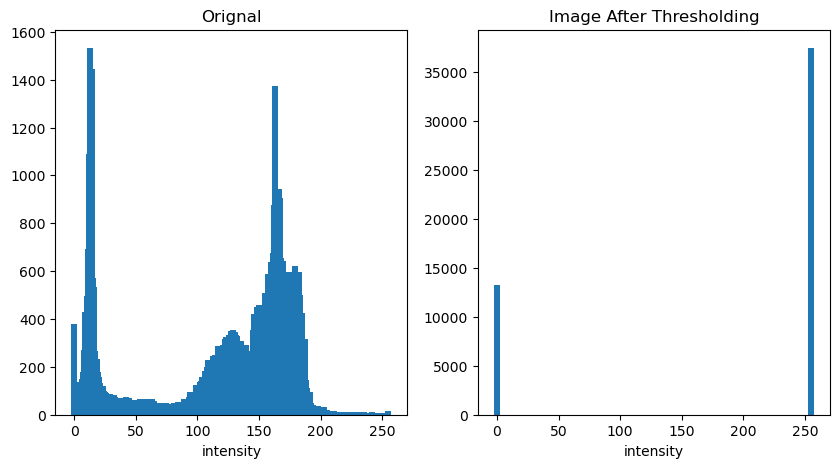

In [39]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

In [40]:
cv2.THRESH_BINARY

0

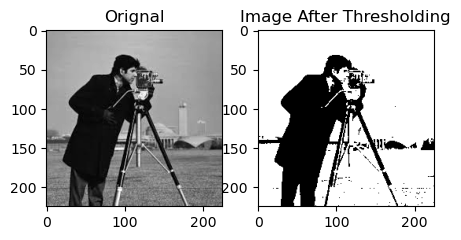

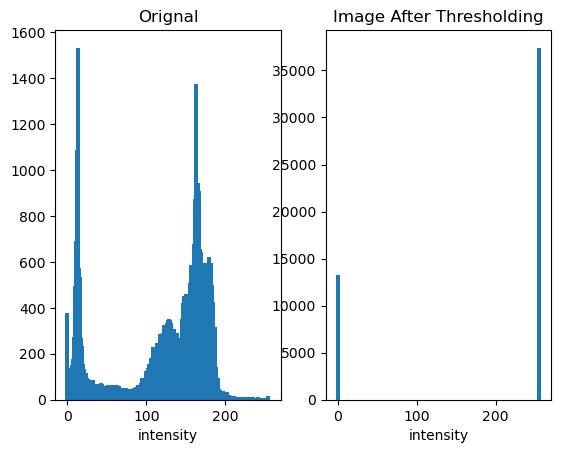

In [41]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

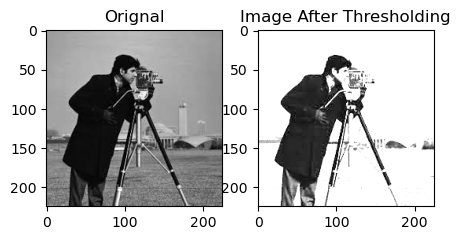

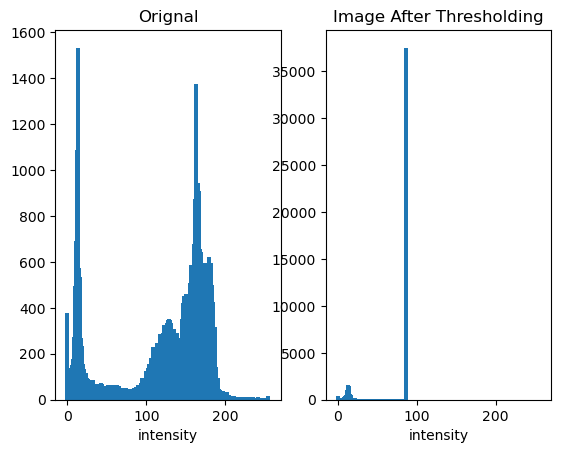

In [42]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

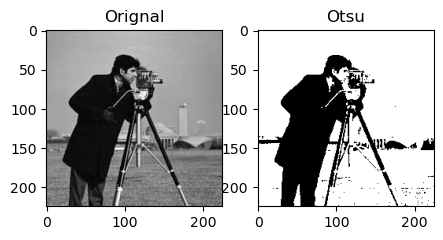

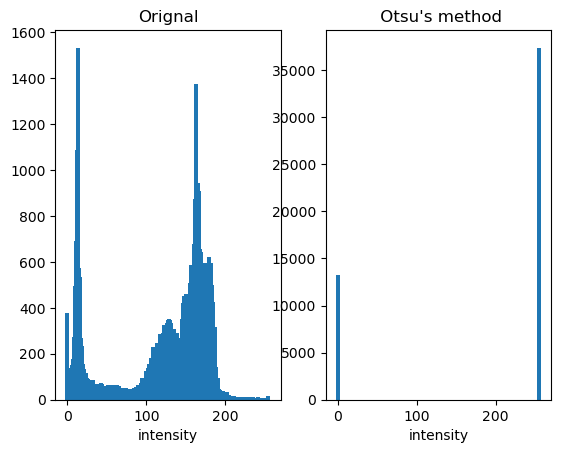

In [43]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [44]:
ret

88.0